In [1]:
#Kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Veriyi Yükleme
insurance = pd.read_csv("insurance.csv")
df = insurance.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
#nan değer
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


<AxesSubplot:xlabel='bmi'>

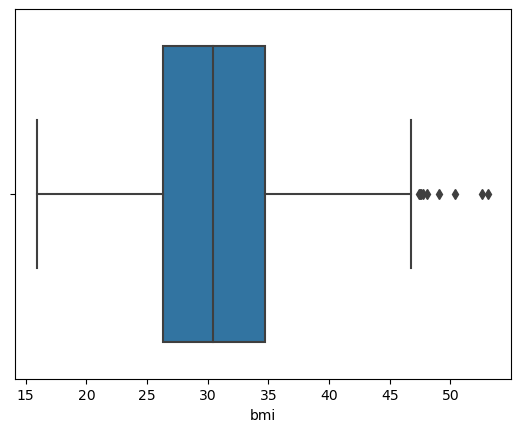

In [6]:
#bmi dağılımı
sns.boxplot(x="bmi", data=df)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

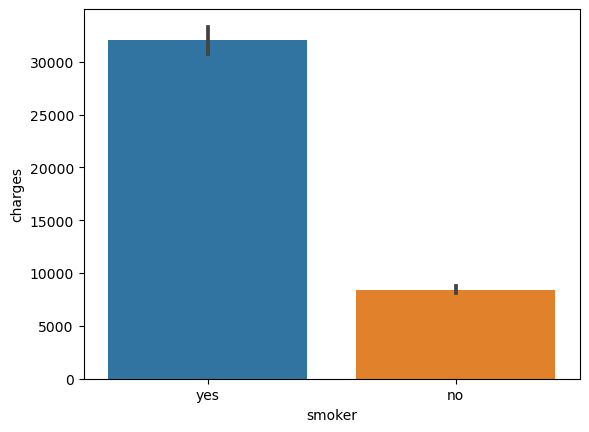

In [7]:
#"Sigara içen” ile “sigorta masrafı” arasındaki ilişki
sns.barplot(x='smoker', y='charges', data=df)
#sigara içenlerin masrafı içmeyenlere göre çok fazla

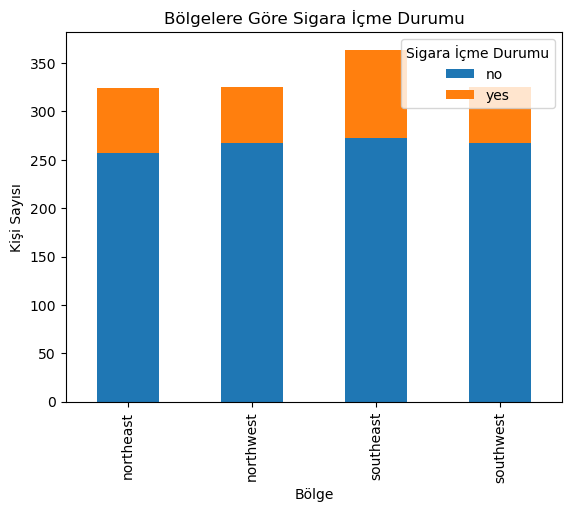

In [8]:
#“Sigara içen” ile “bölge” arasındaki ilişki
region_smoker_counts = df.groupby(['region', 'smoker']).size().unstack()
region_smoker_counts.plot(kind='bar', stacked=True)
plt.title('Bölgelere Göre Sigara İçme Durumu')
plt.xlabel('Bölge')
plt.ylabel('Kişi Sayısı')
plt.legend(title='Sigara İçme Durumu')
plt.show()
#southeast bölgesinde sigara içimi fazla

<AxesSubplot:xlabel='sex', ylabel='bmi'>

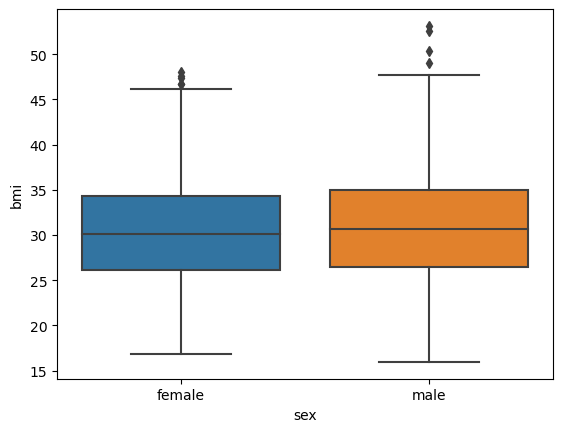

In [9]:
#bmi ile cinsiyet
sns.boxplot(x='sex', y='bmi', data=df)
#female ve male bmi indekleri birbirlerine yakın

<AxesSubplot:xlabel='region'>

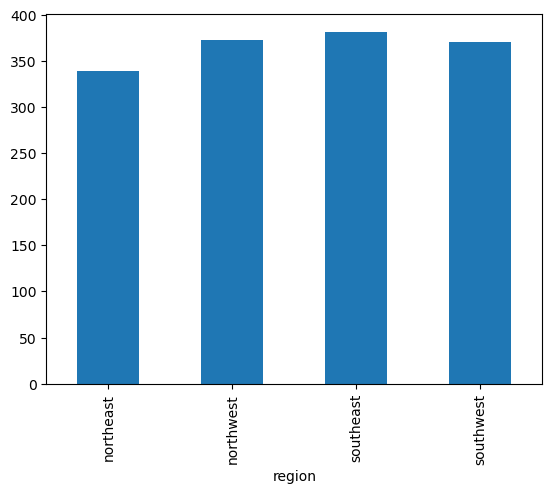

In [10]:
#En çok "çocuk"un bulunduğu "bölgeyi"
child_by_region = df.groupby('region')['children'].sum()
child_by_region.plot(kind='bar')

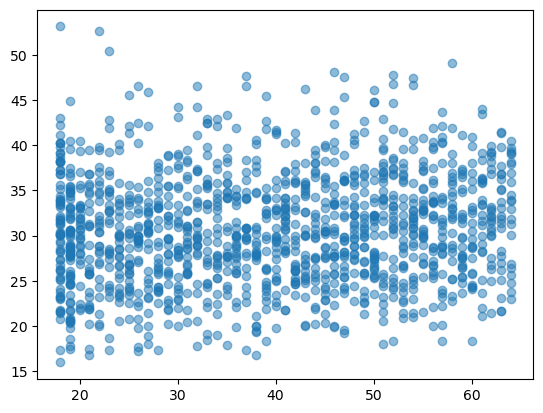

In [11]:
#yaş ile bmi ilişkisi
plt.scatter(df['age'], df['bmi'], alpha=0.5)

<AxesSubplot:xlabel='children', ylabel='bmi'>

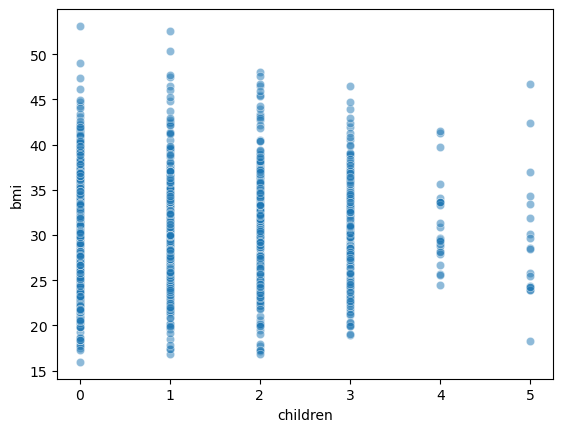

In [12]:
#çocuk sayısına göre bmi
sns.scatterplot(x='children', y='bmi', data=df, alpha=0.5)
#çocuk sayısı arttıkça bmi yüksek çıkmakta

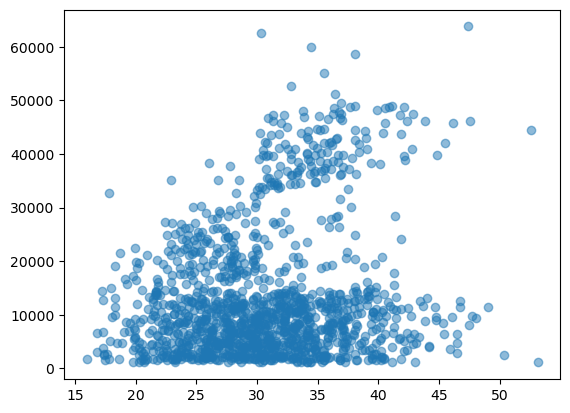

In [13]:
#bmi ile charges arasındaki ilişki
plt.scatter(df['bmi'], df['charges'], alpha=0.5)
#20-35 yaşında olanların masrafı 10000-15000 arasında yığılma fazla

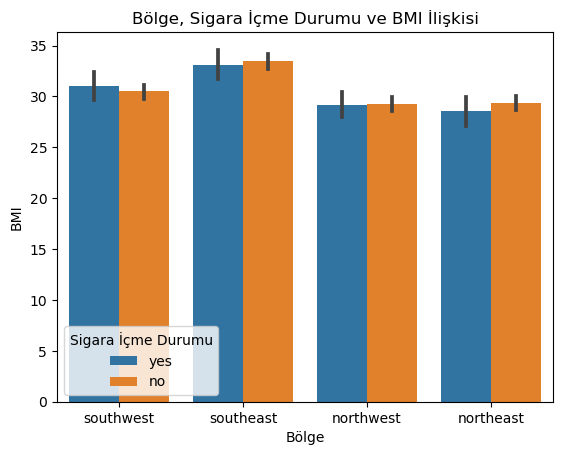

In [14]:
sns.barplot(x='region', y='bmi', hue='smoker', data=df)
plt.title('Bölge, Sigara İçme Durumu ve BMI İlişkisi')
plt.xlabel('Bölge')
plt.ylabel('BMI')
plt.legend(title='Sigara İçme Durumu')
plt.show()

In [15]:
#LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [17]:
y = df['charges']
X = df.drop(['charges'], axis=1)

#train işlemleri
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [18]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

data_minmax_scaled = minmax_scaler.fit_transform(df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']])
data_minmax_scaled

array([[0.02173913, 0.        , 0.3212268 , ..., 1.        , 1.        ,
        0.25161076],
       [0.        , 1.        , 0.47914985, ..., 0.        , 0.66666667,
        0.00963595],
       [0.2173913 , 1.        , 0.45843422, ..., 0.        , 0.66666667,
        0.05311516],
       ...,
       [0.        , 0.        , 0.56201238, ..., 0.        , 0.66666667,
        0.00810808],
       [0.06521739, 0.        , 0.26472962, ..., 0.        , 1.        ,
        0.01414352],
       [0.93478261, 0.        , 0.35270379, ..., 1.        , 0.33333333,
        0.44724873]])

In [19]:
#Lineer Regresyon
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Test seti üzerinde tahmin
y_pred = linear_reg.predict(X_test)

# Hata metriklerini hesaplama
mse = mean_squared_error(y_test, y_pred)
mse

34722525.741719164

In [20]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regresyon modeli
decision_tree_reg = DecisionTreeRegressor(random_state=23)
decision_tree_reg.fit(X_train, y_train)

# Test seti üzerinde tahmin
y_pred_dt = decision_tree_reg.predict(X_test)

# Hata metriklerini hesaplama
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_dt

37355428.90362247

In [21]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regresyon modeli
random_forest_reg = RandomForestRegressor(random_state=23)
random_forest_reg.fit(X_train, y_train)

# Test seti üzerinde tahmin
y_pred_rf = random_forest_reg.predict(X_test)

# Hata metriklerini hesaplama
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_rf
#Random Forest Regressorü en iyi sonucu verdi o yüzden Random Forest Modeli seçilmiştir.

23724057.956157707

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

random_forest_reg = random_forest_reg.predict(X_test)

# Ortalama Kare Hata (Mean Squared Error)
mse_optimized = mean_squared_error(y_test, random_forest_reg)
print(f"Ortalama Kare Hata (MSE): {mse_optimized}")

# Ortalama Mutlak Hata (Mean Absolute Error)
mae_optimized = mean_absolute_error(y_test, random_forest_reg)
print(f"Ortalama Mutlak Hata (MAE): {mae_optimized}")

# Kök Ortalama Kare Hata (Root Mean Squared Error)
rmse_optimized = mean_squared_error(y_test, random_forest_reg, squared=False)
print(f"Kök Ortalama Kare Hata (RMSE): {rmse_optimized}")

# R-kare (Coefficient of Determination)
r2_optimized = r2_score(y_test, random_forest_reg)
print(f"R-kare (Coefficient of Determination): {r2_optimized}")


Ortalama Kare Hata (MSE): 23724057.956157707
Ortalama Mutlak Hata (MAE): 2778.750494680218
Kök Ortalama Kare Hata (RMSE): 4870.734847654685
R-kare (Coefficient of Determination): 0.831335732519976


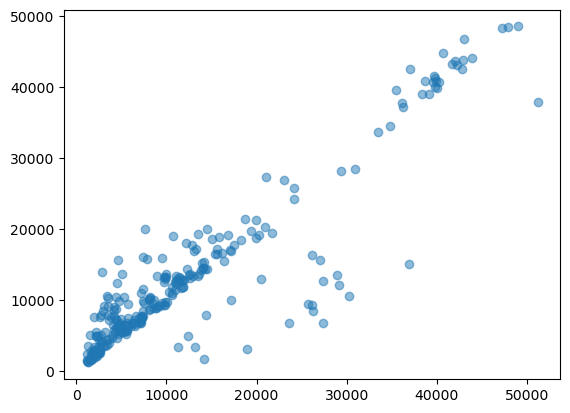

In [23]:
#test ile tahmin değerleri arasındaki ilişki
plt.scatter(y_test, y_pred_rf, alpha=0.5)

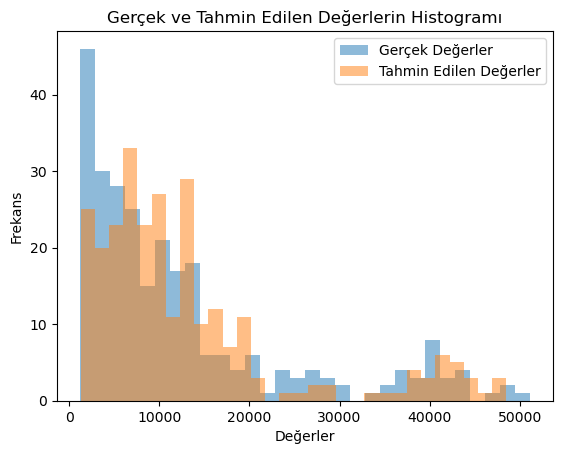

In [24]:
#histogram karşılaştırması
plt.hist(y_test, bins=30, alpha=0.5, label='Gerçek Değerler')
plt.hist(y_pred_rf, bins=30, alpha=0.5, label='Tahmin Edilen Değerler')
plt.xlabel("Değerler")
plt.ylabel("Frekans")
plt.title("Gerçek ve Tahmin Edilen Değerlerin Histogramı")
plt.legend()
plt.show()

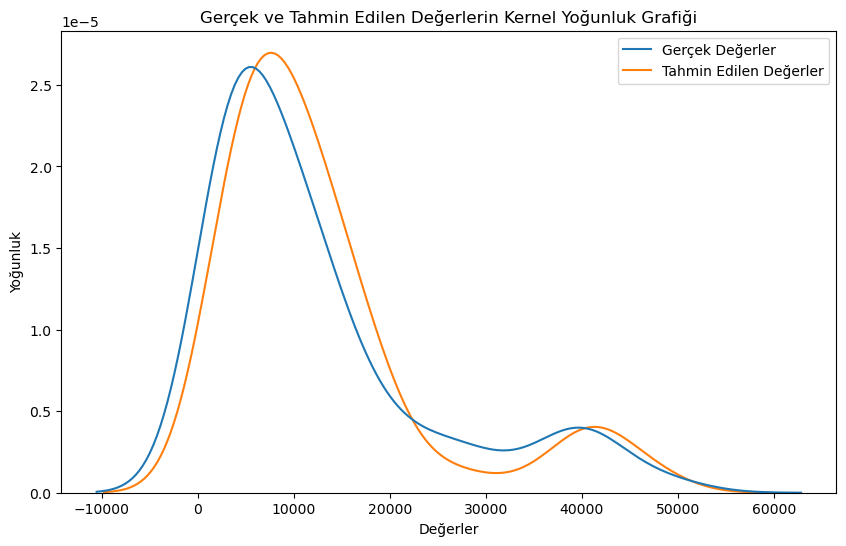

In [25]:
#kernel yoğunluk grafiği
results_df = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahmin Edilen Değerler': y_pred_rf})

plt.figure(figsize=(10, 6))
sns.kdeplot(data=results_df)
plt.xlabel("Değerler")
plt.ylabel("Yoğunluk")
plt.title("Gerçek ve Tahmin Edilen Değerlerin Kernel Yoğunluk Grafiği")
plt.show()